# Solving the Schrödinger Equation

## Different Potention Functions *V*

"Particle in a Box" Potential Functions:
- Infinite Potential Well
- 1D Egg Carton (Cosine Potential)
- Finite Potential Well
- Semi-Infinite Potential Well
- Slanted Potential Well
- V-Shaped (Heaviside-Lambda) Potential Well
- Single/Multiple Internal Barriers
- Spherical Potential Well

Harmonic Oscillator Functions:
- Simple Harmonic Oscillator
- Quartic Oscillator
- Morse Oscillator
- Lennard-Jones Potential
- Double Morse Potential
- 2D Harmonic Oscillator
- 3D Harmonic Oscillator
- Hydrogen Atom Radial Equation
- Modified Harmonic Potential

## Different Numerical Methods

- Finite Difference Method
- Finite Element Method
- Numerov Method
- Split-Step Fourier Method

### Lax-Wendroff Finite Difference Method

The Schrodinger Equation takes the form
$$ -\frac{\hbar^2}{2m}\frac{\partial^2\psi}{\partial x^2} + U\psi = E\psi$$

where $U$ is the potential energy, $E$ is the kinetic energy, $\hbar$ is the reduced Plack constant, $m$ is mass, and $\psi$ is the wavefunction. Because this is a second order PDE, it cannot be integrated directly, so must be somehow simplified.

Say we are integrating over some range $a$ to $b$. In the Finite Difference method, the integral is split up into some discrete grid of $N$ points ranging over $a$ to $b$. At each grid point, the wavefunction $\psi$ at that point is denoted by $\psi_i$, where $i \in (0, N)$. The first derivative of the wavefunction with respect to position $x$ $\psi'$ can be written as:
$$\psi' = \frac{\Delta \psi}{\Delta x} = \frac{\psi_{i+1} - \psi_{i-1}}{2\Delta x}$$
where $\Delta x$ is the grid spacing. From this, we can find that the second derivative with respect to position $x$ can be written as:
$$\psi'' = \frac{\frac{\psi_{i+1} - \psi_{i}}{\Delta x} - \frac{\psi_{i} - \psi_{i-1}}{\Delta x}}{\Delta x} = \frac{\psi_{i+1} - 2\psi_i + \psi_{i-1}}{\Delta x^2}$$

From that, we can now rewrite the Schrodinger equation as:
$$ -\frac{\hbar^2}{2m}\left(\frac{\psi_{i+1} - 2\psi_i + \psi_{i-1}}{\Delta x^2}\right) + U_i\psi_i = E\psi_i$$

We can see now that this is a set of linear equations (that doesn't include the boundaries $\psi_0$ or $\psi_N$). We can then write this as a set of matrix equations:
$$\vec{H}\cdot\vec{\psi} = \vec{E}\cdot\vec{\psi}$$
where $\vec{H}$ is the Hamiltonian matrix:
$$
H = \begin{bmatrix}
\left(\frac{\hbar^2}{m\Delta x^2} + U_i\right) & \left(\frac{-\hbar^2}{2m\Delta x^2}\right) & 0 & \cdots & 0 \\
\left(\frac{-\hbar^2}{2m\Delta x^2}\right) & \left(\frac{\hbar^2}{m\Delta x^2} + U_i\right) & \left(\frac{-\hbar^2}{2m\Delta x^2}\right) & \ddots & \vdots \\
0 & \left(\frac{-\hbar^2}{2m\Delta x^2}\right) & \left(\frac{\hbar^2}{m\Delta x^2} + U_i\right) & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & \left(\frac{-\hbar^2}{2m\Delta x^2}\right) \\
0 & \cdots & 0 & \left(\frac{-\hbar^2}{2m\Delta x^2}\right) & \left(\frac{\hbar^2}{m\Delta x^2} + U_i\right) \\
\end{bmatrix}
$$
$\vec{\psi}$ is the set of wavefunctions:
$$
\vec{\psi} = \begin{bmatrix}
\psi_1 \\
\psi_2 \\
\vdots \\
\vdots \\
\psi_{N-1} \\
\end{bmatrix}
$$
and $\vec{E}$ is the set of eigenvectors corresponding to the Hamiltonian. We can see now that the equation has been reduced to the eigenvalue problem. Now, all that has to be done is to solve for the matrix $\vec{E}$ to retrieve the eigenmodes of the Schrodinger for some potential function $U(x)$.

In [1]:
import numpy as np

def FD_flat_potential(x, L, N):
        """
        Returns the potential function for a particle with a flat potential.
        """
        U = np.ones(len(x) - 2)
        return U

def FD_small_step(x, L = 1, N = 1000, dx = 0):
        U0 = 350
        if type(x) not in [int, float]:
                dx = x[1] - x[0]
                xp = np.linspace(dx, L-dx, N-1)
                U = np.linspace(dx, L-dx, N-1)
                for i in range(len(U)):
                        U[i] = 0
                        if xp[i] > L/2:
                                U[i] = U0
        return U

def FD_complex_step_potential(x, L, N, dx = 0):
        """
        Potential function for the particle.
        """
        if type(x) != int:
                dx = x[1] - x[0]
        xp = np.linspace(dx, L-dx, N-1)
        U = np.linspace(dx, L-dx, N-1)
        for i in range(len(U)):
                if xp[i] > L/4 and xp[i] < 3*L/4:
                        U[i] = 150
                elif (xp[i] >= 3*L/4 and xp[i] <= 5*L/8) or (xp[i] <= L/4 and xp[i] >= L/8):
                        U[i] = 0
                else:
                        U[i] = 90
        return U

def FD_infinite_potential_well(x, L, N, dx = 0):
        """
        Returns the potential function for a particle in an infinite potential well of length L.
        """
        if type(x) not in [int, float]:
                dx = x[1] - x[0]
                xp = np.linspace(dx, L-dx, N-1)
                U = np.zeros_like(xp)
                for i in range(len(U)):
                        if xp[i] < L/8 or xp[i] > 7*L/8:
                                U[i] = 50000
        return U

def FD_V_shaped__potential_well(x, L, N, slope = 400, dx = 0):
        """Returns the potential function for a particle in a V-shaped infinite potential well centre at x=L/2.

        Args:
                x (int or numpy.ndarray): The position of the particle.
                L (int): the length of the well
        """
        if type(x) != int:
                dx = x[1] - x[0]
        xp = np.linspace(dx, L-dx, N-1)
        U = np.ones_like(xp)
        for i in range(len(U)):
                U[i] = slope*abs(xp[i] - L/2) + 1
        return U

In [24]:
## Finite Difference
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

def finite_difference(potential_func, N, num_plots = 4, plot = True, scale = 1):
        '''
        Solves the Schrodinger equation using the finite difference method
        and plots the results.
        Inputs:
        - potential_func: The potential function for the particle.
        - N: The number of points in the grid.
        - num_plots: The number of energy levels to plot.
        - plot: Whether or not to plot the results.
        - scale: The scaling factor for the wave functions.

        Outputs:
        None

        '''
        def create_hamiltonian_matrix(N, m, hbar, Vpot, dx):
                """
                Helper Function
                Create the Hamiltonian matrix for the given potential.
                Inputs:
                - N: The number of points in the grid.
                - m: The mass of the particle.
                - hbar: Planck's constant.
                - Vpot: The potential array for the particle.
                - dx: The step size.

                Outputs:
                - Hmat: The Hamiltonian matrix.
                """
                diag_el = hbar**2/(m*dx**2)*np.ones(N-1) + Vpot
                off_diagonal_elements = -hbar**2/(2*m*dx**2)*np.ones(N - 2)
                Hmat = np.diag(diag_el) + np.diag(off_diagonal_elements, 1) + np.diag(off_diagonal_elements, -1)

                return Hmat
        
        
        hbar = 1 # Planck's constant set to 1 for simplicity
        m = 1 # Mass of the particle set to 1 for simplicity
        a = 1 # Length of the well

        x = np.linspace(0, a, N+1) # Grid points
        dx = x[1] - x[0] # Step size
        xp = np.linspace(dx, a-dx, N-1) # Grid points for plotting

        U = potential_func(x, a, N) # Potential function
        E, psi = eigh(create_hamiltonian_matrix(N, m, hbar, U, dx)) # Solve the Schrodinger equation

        # Fetch the name of the potential function for plotting reasons
        plot_title = potential_func.__name__.split('_')
        for i in range(len(plot_title)):
                plot_title[i] = plot_title[i].title()
        if "Fd" in plot_title:
            plot_title = plot_title[1:]
        plot_title = ' '.join(plot_title)

        if plot:
                # Get a color map
                cmap = plt.get_cmap('cool')
                colors = [cmap(i) for i in np.linspace(0, 1, num_plots)]

                plt.figure(1)
                plt.title(f"Finite Difference Method, {plot_title}")
                plt.plot(x[1:-1], U, 'k--', label = "Potential")

                # Set limits for any infinite potential wells
                if "Infinite" in plot_title:
                        plt.ylim(0, 300)

                        # Find index of the left and right walls of the well
                        for i in range(len(U)):
                                if U[i] == 50000:
                                        left_wall = i
                                else:
                                        break
                        right_wall = len(U) - 1
                        for i in range(len(U) - 1, 0, -1):
                                if U[i] == 50000:
                                        right_wall = i
                                else:
                                        break
                        print(left_wall, right_wall, len(U))
                        
                        for i in range(num_plots): 
                                cur_psi = psi.T[i]**2
                                I = np.sum(psi.T[i]**2 * dx)
                                A = np.sqrt(1/I)
                                plt.plot(xp[left_wall:right_wall+1], (scale*A*psi.T[i][left_wall:right_wall+1])**2 + E[i], color = colors[i], label = f"n = {i}")

                                # Plot a straight dotted line at the energy level
                                plt.plot(xp, np.ones_like(xp)*E[i], '--', color = colors[i])

                                print(f"Energy level {i}: {E[i]}")
                else:
                        for i in range(num_plots): 
                                cur_psi = psi.T[i]**2
                                I = np.sum(psi.T[i]**2 * dx)
                                A = np.sqrt(1/I)
                                plt.plot(xp, (scale*A*psi.T[i])**2 + E[i], color = colors[i], label = f"n = {i}")

                                # Plot a straight dotted line at the energy level
                                plt.plot(xp, np.ones_like(xp)*E[i], '--', color = colors[i])
                                
                                print(f"Energy level {i}: {E[i]}")


                # Plot Vertical lines at 0 and 1
                plt.axvline(x = 0.001, color = 'k', ls = '--')
                plt.axvline(x = 0.999,  color = 'k', ls = '--')

                plt.xlabel('x')
                plt.ylabel('Energy (J)')
                if "Small Step" in plot_title:
                        plt.legend(loc = "lower right")
                else:
                        plt.legend()
                plt.savefig(f"Figures/FD_{'_'.join(plot_title.split(' '))}.jpeg", dpi = 600)
                plt.show()
                

Energy level 0: 5.934798141991124
Energy level 1: 20.73914386295678
Energy level 2: 45.41289105044172
Energy level 3: 79.95579618402125
Energy level 4: 124.36751833958473


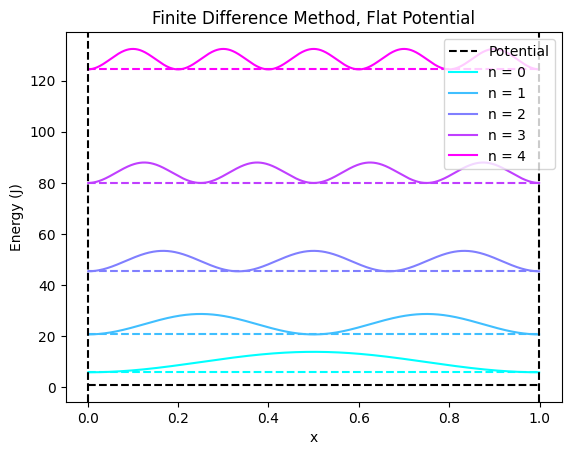

Energy level 0: 17.010433485952394
Energy level 1: 67.78243532509768
Energy level 2: 151.3237282337877
Energy level 3: 264.5302843904339
Energy level 4: 366.15479073171286


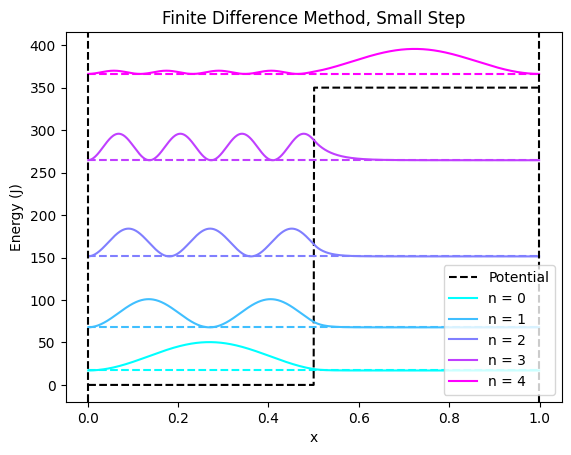

Energy level 0: 70.44037049490717
Energy level 1: 128.84143176568182
Energy level 2: 166.79294822313886
Energy level 3: 200.38152315966255
Energy level 4: 238.55784781104785


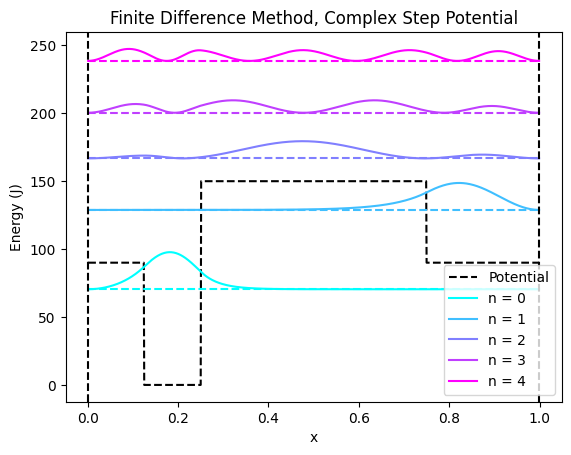

123 875 999
Energy level 0: 8.602303232823841
Energy level 1: 34.40901852874228
Energy level 2: 77.41956257811394
Energy level 3: 137.63296285838584
Energy level 4: 215.04785712218805


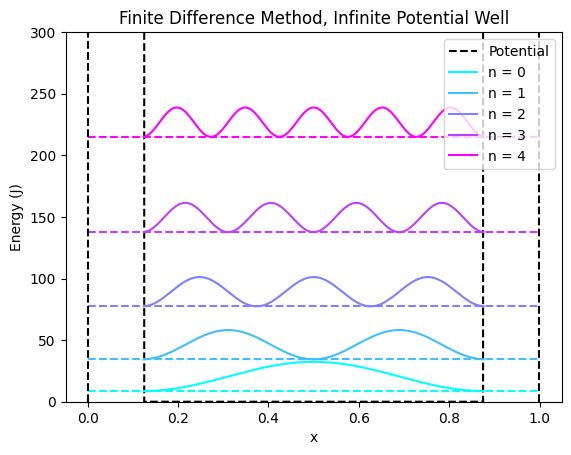

Energy level 0: 44.90034178644371
Energy level 1: 101.8700604772662
Energy level 2: 142.2111180381097
Energy level 3: 183.58819589048494
Energy level 4: 228.11758004529986


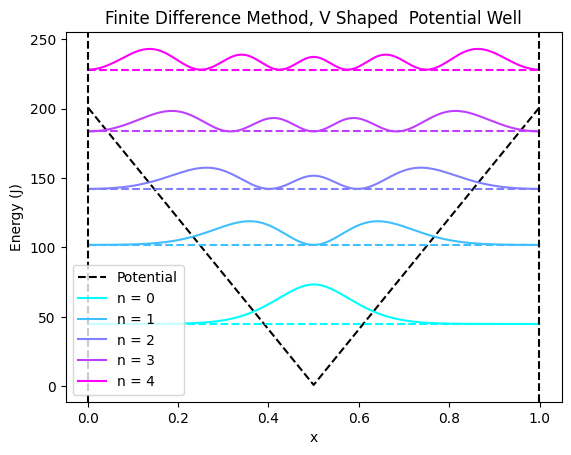

In [25]:
finite_difference(FD_flat_potential, 1000, 5, scale = 2)
finite_difference(FD_small_step, 1000, 5, scale = 3)
finite_difference(FD_complex_step_potential, 1000, 5, scale = 2)
finite_difference(FD_infinite_potential_well, 1000, 5, scale = 3)
finite_difference(FD_V_shaped__potential_well, 1000, 5, scale = 2.5)

### Numerov Method

The Schrödinger equation is commonly expressed as

\begin{equation}
-\frac{\hbar^2}{2m}\frac{d^2}{dx^2}\psi_n(x) + V(x)\psi_n(x) = E_n\psi_n(x),
\end{equation}

where $\psi_n(x)$ represents the wavefunctions, $E_n$ denotes the eigenstates, and $V(x)$ is a given potential. To simplify calculations and remove factors of $\hbar$, it is advantageous to work with a simplified form of the equation:

\begin{equation}
\frac{d^2}{dx^2}\psi(x) + k^2(x)\psi(x) = 0,
\end{equation}

where $k^2(x) = \frac{2m}{\hbar}(E - V(x))$.

Following this, a Taylor expansion of $\psi(x + \Delta x)$ can be written as

\begin{equation}
\psi(x + \Delta x) = \psi(x) + \Delta x\frac{d\psi}{dx} + \frac{\Delta x^2}{2}\frac{d^2\psi}{dx^2} + \frac{\Delta x^3}{6}\frac{d^3\psi}{dx^3} + \frac{\Delta x^4}{24}\frac{d^4\psi}{dx^4} + \ldots
\end{equation}

If we then add a similar Taylor series for $\psi(x - \Delta x)$, all the off powers of $\Delta x$ vanish:

\begin{equation}
\psi(x + \Delta x) + \psi(x - \Delta x) = 2\psi(x) + \frac{\Delta x^2}{2}\frac{d^2\psi}{dx^2} + \frac{\Delta x^4}{24}\frac{d^4\psi}{dx^4} + O(\Delta x^6)...
\end{equation}

We can, therefore, write the second derivative term $\frac{\partial^2\psi}{\partial x^2}$ from the Schrödinger equation as

\begin{equation}
\dfrac{\partial^2\psi}{\partial x^2} = \frac{\psi(x + \Delta x) + \psi(x - \Delta x) - 2\psi(x)}{\Delta x^2} - \frac{\Delta x^2}{12}\frac{\partial^4\psi}{\partial x^4} + O(\Delta x^2)
\end{equation}

Since we would like to evaluate the 4th derivative term, we can act on the equation with $1 + \frac{\Delta x^2}{12}\frac{\partial^2}{\partial x^2}$ and substitute the Taylor expansion result for $\dfrac{\partial^2\psi}{\partial x^2} + \frac{\Delta x^2}{12}\frac{\partial^4\psi}{\partial x^4}$, which gives us

\begin{equation}
\psi(x + \Delta x) + \psi(x - \Delta x) - 2\psi(x) + \Delta x^2k^2(x)\psi(x) + \frac{\Delta x^4}{12}\frac{\partial^2}{\partial x^2}(k^2(x)\psi(x) + O(\Delta x^6)) = 0
\end{equation}

We can evaluate $\frac{\Delta x^4}{12}\frac{\partial^2}{\partial x^2}(k^2(x)\psi(x))$ by using a finite difference formula to get

\begin{equation}
\frac{\Delta x^4}{12}\frac{\partial^2}{\partial x^2}(k^2(x)\psi(x)) \approx \frac{k^2(x+\Delta x)\psi(x+\Delta x) + k^2(x-\Delta x)\psi(x-\Delta x) - 2k^2(x)\psi(x)}{\Delta x^2}
\end{equation}

Then, we can substitute \autoref{eq: numerov_penstep1} into \autoref{eq: numerov_penstep2} and rearrange to get the Numerov algorithm for one time-step:

\begin{equation}
\psi(x + \Delta x) = \frac{2(1 - \frac{5}{12}\Delta x^2k^2(x))\psi(x) - (1 + \frac{1}{12}\Delta x^2k^2(x - \Delta x))\psi(x - \Delta x)}{1 + \frac{1}{12}\Delta x^2k^2(x + \Delta x)}
\end{equation}

and finally, if we set $x = x_n \equiv x_0 + n\Delta x$ and $k_n \equiv k(x_n)$, we can write it cleanly as

\begin{equation}
\psi_n = \frac{2(1 - \frac{5}{12}\Delta x^2k^2_n)\psi_n - (1 + \frac{1}{12}\Delta x^2k^2_{n-1})\psi_{n-1}}{1 + \frac{1}{12}\Delta x^2k^2_{n+1}}
\end{equation}

In [5]:
import numpy as np

def Nv_flat_potential(x):
        """
        Returns the potential function for a particle with a flat potential.
        """
        U = np.ones(len(x))
        return U

def Nv_small_step_potential(x):
        """
        Returns the potential function for a particle with a small step in the centre.
        """
        U = np.ones(len(x))
        for i in range(len(U)):
                if i > len(x)/2:
                        U[i] = 5
        return U

def Nv_complex_step_potential(x):
        """
        Returns the potential function for a particle with a complex step in the centre.
        """
        L = len(x)
        U = np.ones(L)
        for i in range(L):
                if i > L/4 and i < 3*L/4:
                        U[i] = 9
                elif (i >= 3*L/4 and i <= 5*L/8) or (i <= L/4 and i >= L/8):
                        U[i] = 0
                else:
                        U[i] = 4
        return U

def Nv_infinite_potential_well(x):
        """
        Returns the potential function for a particle in an infinite potential well.
        """
        L = len(x)
        U = np.zeros(L)
        for i in range(len(U)):
                if i < L/8 or i > (7*L)/8:
                        U[i] = 200
        return U

def Nv_V_shaped_potential(x, slope = 5):
        """
        Returns the potential function for a particle in a V-shaped infinite potential well.
        """
        L = len(x)
        U = np.ones(L)
        for i in range(len(U)):
                cur_x = x[i]
                U[i] = slope*abs(cur_x - x[L//2]) + 1 # Should be no 0 or negative potentials
        
        return U

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson as simps

def Numerov(potential_function, num_states, N = 1000, plot = True, scale = 1):
    '''
    This function solves the Schrodinger equation using the Numerov method.
    It makes use of the epsilon, wavefunction, and normal_helper functions.
    Inputs:
    - potential_function (function): The potential function for the particle.
    - num_states (int): The number of energy levels to plot.
    - N (int): Number of steps
    - plot (boolean): Whether or not to plot the results.
    - scale (float): Scales the wavefunction for plotting purposes

    Outputs:
    None
    
    '''
    def wavefunction(Psi, k, N, dx):
        '''
        Helper Function
        This function calculates the wavefunction using the Numerov method.
        Inputs:
        - Psi (numpy.ndarray or list): Contains the amplitude of the wavefunction at discrete points along the grid
        - k (numpy.ndarray or list): Contains the k values for each point along the grid
        - N (int): Number of steps
        - dx (float): Step size

        Outputs:
        - Psi (numpy.ndarray): The wavefunction after integrating via the Numerov method

        '''
        Psi[0] = 0
        Psi[1] = 1e-4

        for i in range(2, N):
            Psi[i] = (2 * (1 - (5/12) * dx * k[i-1]) * Psi[i-1] - (1 + (1/12) * dx * k[i-2]) * Psi[i-2]) / (1 + (1/12) * dx * k[i])
        return Psi

    def epsilon(E, dE, N, v, Psi, dx):
        '''
        Helper Function
        This function calculates the eigenstate of the particle using the Numerov method.
        This function takes some rough initial energy guess and refines it using the Numerov method to get a more accurate initial guess for the energy.
        Inputs:
        - E (float): Initial Energy guess of the particle
        - dE (float): Energy step
        - N (int): Number of x-axis points
        - v (numpy.ndarray): Potential Energy Array
        - Psi (numpy.ndarray): Wavefunction Array
        - dx (float): Step size

        Outputs:
        - E (float): The approximate eigenstate of the particle
        
        '''
        gamma = 200 # gamma^2 = 2mL^2V0/hbar^2
        k = gamma * (E - v) # Updates k each time
        Psi = wavefunction(Psi, k, N, dx)
        P1 = Psi[N - 1]
        E += dE

        while abs(dE) > 1e-12: # Sets accuracy of the function
            k = gamma*(E - v)
            Psi = wavefunction(Psi, k, N, dx)
            P2 = Psi[N - 1]

            if P1*P2 < 0: # Sign change
                dE = -dE/2.0
            
            E += dE
            P1 = P2
        return E # Return eigenstate

    psi_hist = [] # stores the Wavefunctions of the first num_states eigenstates in an array
    E_array = [] # Energy array

    E_i = 0.01 # Initial energy guess
    gamma = 200 # variable gamma: gamma^2 = 2mL^2V0/hbar^2
    dE = 0.1 # Change in energy
    dx = (1/(N-1))**2 # Step size
    
    xx = np.linspace(0, 1, N) # Grid points
    v = np.array(potential_function(xx)) # Potential Energy Array

    while len(psi_hist) < num_states:  # Gets the first num_states eigenstates
        Psi = np.zeros(N) # Wavefunction, starts as an empty array
        E_trial = epsilon(E_i, dE, N, v, Psi, dx) # Gets the eigenstate guess
        k = gamma*(E_trial - v) # variable k: k^2 = gamma^2*(epsilon - v)
        p = wavefunction(Psi, k, N, dx) # Gets the wavefunction

        psi_hist += [p]
        E_array += [E_trial]
        E_i = E_trial + 0.1 # Updates the initial energy guess to get the next energy level

    if plot:
        # Fetch the name of the potential function for plotting reasons
        plot_title = potential_function.__name__.split('_')
        for i in range(len(plot_title)):
            plot_title[i] = plot_title[i].title()
        if "Nv" in plot_title: # Drop the "Nv" from the potential function name
            plot_title = plot_title[1:]

        plot_title = ' '.join(plot_title)

        # Get a color map
        cmap = plt.get_cmap('cool')
        colors = [cmap(i) for i in np.linspace(0, 1, num_states)]

        plt.figure(1)
        plt.title(f"Numerov Method, {plot_title}")
        # Plot the potential function

        
        if "V Shaped" in plot_title: # Edit the plot of the V-shaped well a bit so you can actually see the wavefunctions
            plt.plot(xx, potential_function(xx, slope = 7), 'k--', label = "Potential")
            plt.ylim(0, 5)
        else:
            plt.plot(xx, v, 'k--', label = "Potential")

        # Set limits for any infinite potential wells
        if "Infinite" in plot_title:
            plt.ylim(0, 3)

            # Find index of the left and right walls of the well
            for i in range(len(v)):
                if v[i] == 200:
                    left_wall = i
                else:
                    break
            right_wall = len(v) - 1
            for i in range(len(v) - 1, 0, -1):
                if v[i] == 200:
                    right_wall = i
                elif v[i] != 200:
                    break
            
            for i in range(len(psi_hist)):
                # Only plot the wavefunction within the walls of the well

                cur_psi = np.array(psi_hist[i]) # Square the wavefunction to get the probability density
                I = np.sum(cur_psi**2 * dx) # Get the area under the wavefunction
                A = np.sqrt(1/I) # Amplitude
                print(f"Energy level {i}: {E_array[i]}")
                plt.plot(xx[left_wall:right_wall+1], (A*scale*cur_psi[left_wall:right_wall+1])**2 + E_array[i], c = colors[i], label = f"n = {i}")

                # Plot a straight dotted line at the energy level
                plt.plot(xx, np.ones_like(xx)*E_array[i], '--', color = colors[i])
            
        else:
            for i in range(len(psi_hist)):
                cur_psi = np.array(psi_hist[i]) # Square the wavefunction to get the probability density
                I = np.sum(cur_psi**2 * dx) # Get the area under the wavefunction
                A = np.sqrt(1/I) # Amplitude
                print(f"Energy level {i}: {E_array[i]}")
                plt.plot(xx, (A*scale*cur_psi)**2 + E_array[i], c = colors[i], label = f"n = {i}")

                # Plot a straight dotted line at the energy level
                plt.plot(xx, np.ones_like(xx)*E_array[i], '--', color = colors[i])
        
        # Plot Vertical lines at 0 and 1
        plt.axvline(x = 0.001, color = 'k', ls = '--')
        plt.axvline(x = 0.999,  color = 'k', ls = '--')        


        plt.xlabel('x')
        plt.ylabel('Energy (J)')
        if "Small Step" in plot_title:
            plt.legend(loc = "lower right")
        else:
            plt.legend()
        plt.savefig(f"Figures/NM_{'_'.join(plot_title.split(' '))}.jpeg", dpi = 600)
        plt.show()
        


Energy level 0: 1.0493480220045603
Energy level 1: 1.1973920880199878
Energy level 2: 1.4441321980355137
Energy level 3: 1.7895683520060277
Energy level 4: 2.2337005498223905


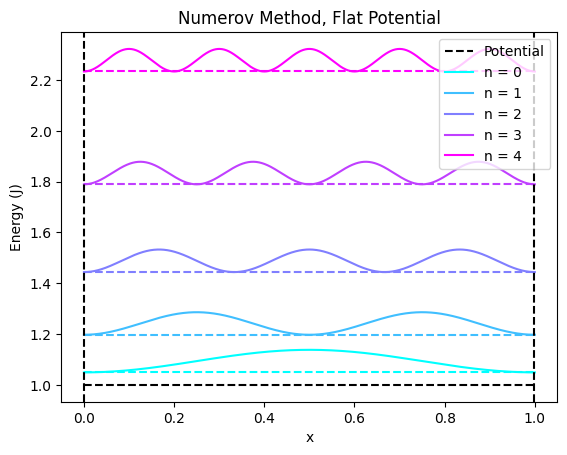

Energy level 0: 1.1713729802811579
Energy level 1: 1.6833625897104512
Energy level 2: 2.5280841533532676
Energy level 3: 3.683487106699034
Energy level 4: 5.012483539452806


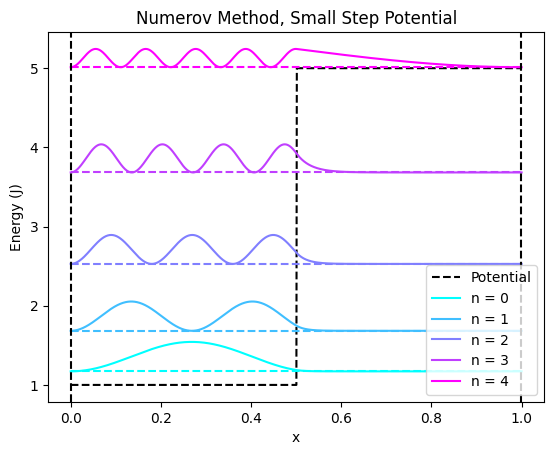

Energy level 0: 1.3963806935631151
Energy level 1: 4.620242323874264
Energy level 2: 4.781968420562188
Energy level 3: 6.4344370941480085
Energy level 4: 7.519704181385303


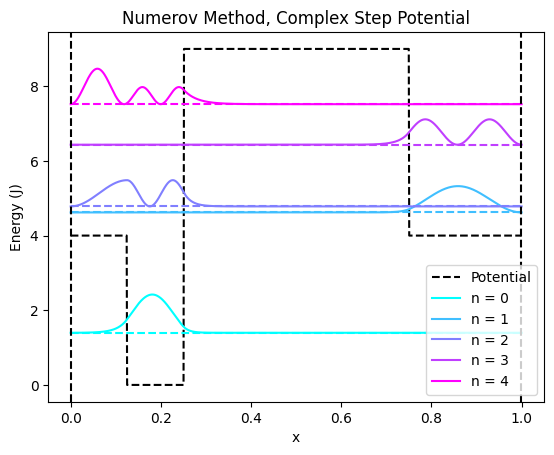

Energy level 0: 0.08503623159791458
Energy level 1: 0.3401430449879262
Energy level 2: 0.7653147852311666
Energy level 3: 1.3605419915192762
Energy level 4: 2.125811342778762


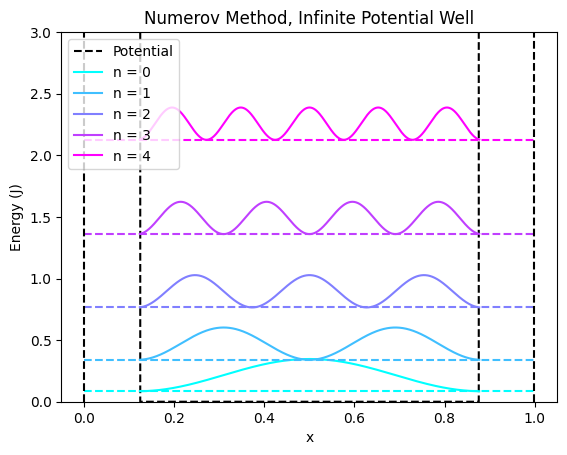

Energy level 0: 1.5093990485607358
Energy level 1: 2.1695247252960694
Energy level 2: 2.6299957306722366
Energy level 3: 3.0810638555567147
Energy level 4: 3.5394848022975216


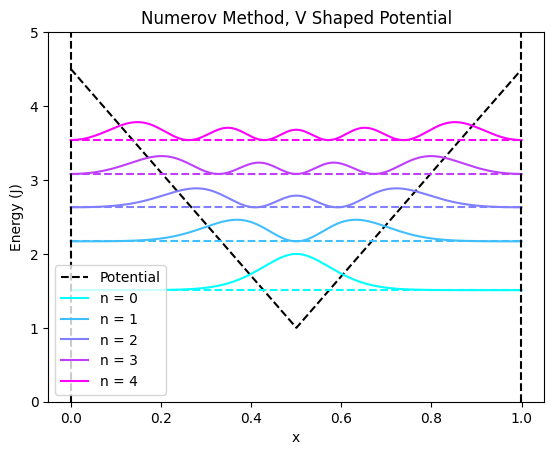

In [27]:
Numerov(Nv_flat_potential, 5, scale = 1/150)
Numerov(Nv_small_step_potential, 5, scale = 1/100)
Numerov(Nv_complex_step_potential, 5, scale = 1/100)
Numerov(Nv_infinite_potential_well, 5, scale = 1/100)
Numerov(Nv_V_shaped_potential, 5, scale = 1/100)

In [ ]:
def an_fun(m, L, hbar, n):
        """
        Helper Function
        Returns the analytic solution for the energy of a particle in an infinite potential well.
        """
        return n**2*(hbar)**2/(8*m*L**2)

for i in range(1, 6):
        hbar = 1.0545718e-34 # Planck's constant
        m = 1.6726219e-27 # Mass of a proton
        L = 1
        print(an_fun(m, L, hbar, i))

8.311215473706579e-43
3.3244861894826315e-42
7.480093926335922e-42
1.3297944757930526e-41
2.077803868426645e-41
